In [32]:
import numpy as np
import pandas as pd

dataset = pd.read_csv("mall_customers.csv")

dataset.set_axis(["CustomerID", "gender", "age", "income", "score"], axis='columns', inplace=True)
dataset.head()

<ipython-input-32-8a263cc7a09e>:6: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  dataset.set_axis(["CustomerID", "gender", "age", "income", "score"], axis='columns', inplace=True)


,CustomerID,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Pre-processamento dos dados

In [33]:

dataset["gender"] = dataset["gender"].apply(lambda x: 1 if x == "Female" else 0)
dataset.head()


,CustomerID,gender,age,income,score
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [34]:
#Feature scalling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(dataset[["age","income"]])


dataset[["age","income"]] = scaler.transform(dataset[["age","income"]])

joblib.dump(scaler, 'scaler.gz')

dataset.head()

,CustomerID,gender,age,income,score
0,1,0,0.019231,0.000000,39
1,2,0,0.057692,0.000000,81
2,3,1,0.038462,0.008197,6
3,4,1,0.096154,0.008197,77
4,5,1,0.250000,0.016393,40


In [35]:
y = dataset.iloc[:,-1:]
X = dataset.drop(columns=["score", "CustomerID", "gender"])

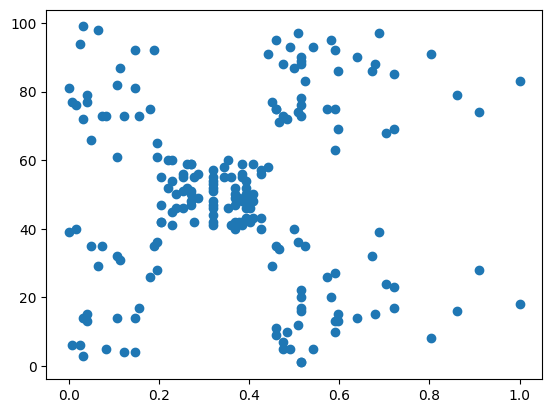

In [36]:
import matplotlib.pyplot as mp

mp.scatter(dataset["income"], dataset["score"])

In [7]:
print(X)
print(y)

          age    income
0    0.019231  0.000000
1    0.057692  0.000000
2    0.038462  0.008197
3    0.096154  0.008197
4    0.250000  0.016393
..        ...       ...
195  0.326923  0.860656
196  0.519231  0.909836
197  0.269231  0.909836
198  0.269231  1.000000
199  0.230769  1.000000

[200 rows x 2 columns]
     score
0       39
1       81
2        6
3       77
4       40
..     ...
195     79
196     28
197     74
198     18
199     83

[200 rows x 1 columns]


## Modelo e treinamento

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [38]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

#test some regressors algorithms
adaboost = AdaBoostRegressor(random_state=42)
linear = LinearRegression()
svr = SVR(kernel='rbf')

models = [adaboost, linear, svr]

for model in models:
  regressor = model.fit(X_train, y_train);
  print(regressor.score(X_test, y_test))


0.3236339781619402
0.14967376716511394
0.10253673049217837


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Melhoria no modelo

In [39]:

from sklearn.model_selection import GridSearchCV

#improve adaboost algorithm
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [1.0,0.01, 0.001, 0.0001],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=adaboost, param_grid=param_grid, cv=5)

grid_search.fit(X, y)

# Get the best hyperparameters and corresponding model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Best Hyperparameters: {'learning_rate': 1.0, 'n_estimators': 50}


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
model = AdaBoostRegressor(random_state=42, learning_rate=0.001, n_estimators=50)
reg = model.fit(X_train,y_train)
reg.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.3790088114600797

In [41]:
new_data = [[19, 2]]
model.predict(scaler.transform(new_data))
#scaler.fit_transform([[30.0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  warnings.warn(


array([53.81818182])

## Salvando modelo

In [42]:
import joblib

# Save the model to a file
joblib.dump(model, 'model_regressor.pkl')


['model_regressor.pkl']